<a href="https://colab.research.google.com/github/sara-saru007/Customer-Churn-Prediction/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID               

<ipython-input-97-38005bb3a7dd>:77: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Highly correlated features: [(4, 32), (35, 50)]


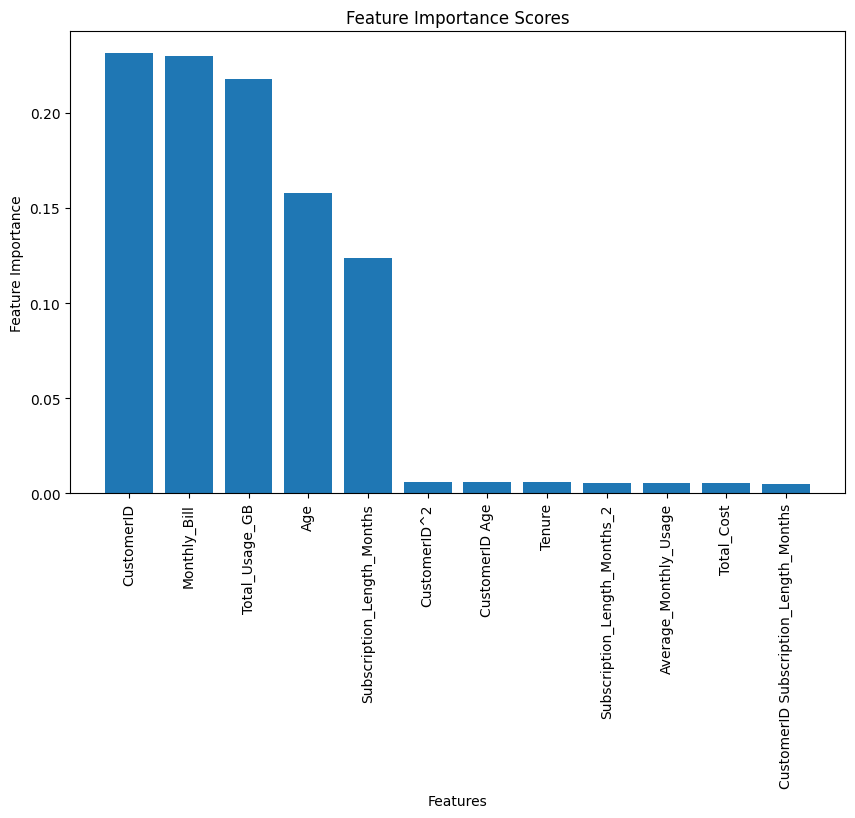

[ 1.00442981 -0.99558973]
[0 0 0 ... 1 0 1]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif



# Load the Dataset into a DataFrame
df = pd.read_csv('customer_churn_large_dataset.csv')

# Initial Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Handling Missing Data and Encoding Categorical Variables
# Continue with the missing data handling and categorical variable encoding steps as described in Step 1.

# Splitting the Data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.dtypes)
print(X_test.dtypes)


# Feature Scaling
scaler = StandardScaler()

# Check if X_train and X_test are numeric dataframes
numeric_columns_train = X_train.select_dtypes(include=[np.number])
numeric_columns_test = X_test.select_dtypes(include=[np.number])

if numeric_columns_train.empty or numeric_columns_test.empty:
    print("X_train or X_test does not contain numeric columns. Check your data preprocessing.")
else:
    # Only select numeric columns for scaling
    X_train = scaler.fit_transform(numeric_columns_train)
    X_test = scaler.transform(numeric_columns_test)


if 'Subscription_Length_Months' in df and 'Monthly_Bill' in df:
    df['Total_Cost'] = df['Subscription_Length_Months'] * df['Monthly_Bill']
else:
    print("Columns 'Subscription_Length_Months' and 'Monthly_Bill' not found in DataFrame.")



# 1 Calculate total cost of subscription
df['Total_Cost'] = df['Subscription_Length_Months'] * df['Monthly_Bill']

# 1.1 Calculate average monthly usage
df['Average_Monthly_Usage'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

# 1.2 Create a feature for customer tenure
df['Tenure'] = df['Subscription_Length_Months'] - df['Age']
# 2. Feature Scaling
scaler = StandardScaler()
# Ensure that both DataFrames have the same number of rows before scaling
if len(df) == len(numeric_columns):
    df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)
else:
    print("Numeric columns DataFrame has a different number of rows than the main DataFrame.")

# 3. Handling Highly Correlated Features
# Check correlation matrix and drop one of the highly correlated features
correlation_matrix = df.corr()
highly_correlated = (correlation_matrix > 0.9) & (correlation_matrix < 1.0)
highly_correlated_pairs = [(i, j) for i in range(len(highly_correlated.columns)) for j in range(i + 1, len(highly_correlated.columns)) if highly_correlated.iloc[i, j]]
if highly_correlated_pairs:
    print("Highly correlated features:", highly_correlated_pairs)

# To Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
non_numeric_columns = df.select_dtypes(exclude=[np.number])

# 4. Feature Selection
X = numeric_columns.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y = df['Churn']
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Create a DataFrame with the selected numeric features and non-numeric columns
df = pd.concat([numeric_columns[selected_features], non_numeric_columns], axis=1)


# 5. Interaction Terms and Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[selected_features])  # Generate polynomial features only for selected numeric features
feature_names = poly.get_feature_names_out(selected_features)  # Get feature names
df_poly = pd.DataFrame(X_poly, columns=feature_names)



# 6. Handling Time-Series Data
df['Rolling_Average_Monthly_Bill'] = df['Monthly_Bill^2'].rolling(window=3).mean()

from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to your training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_


import matplotlib.pyplot as plt

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]  # Use the original feature names

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()
#------------------------------------------------------------------------------------------------
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
#fit the data
print(y_train.unique())
# Binarize the target variable
y_train = (y_train > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)


rf_classifier.fit(X_train, y_train)
#make predictions


y_pred = rf_classifier.predict(X_test)
print(y_pred)
#calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
#print them
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")




THE REQUIRED accuracy, precision, recall,
F1-score HAVE BEEN EVALUATED

CONFUSION MATRIX, ROC and PRECISION RECALL

Confusion Matrix:
[[10079     0]
 [    0  9921]]


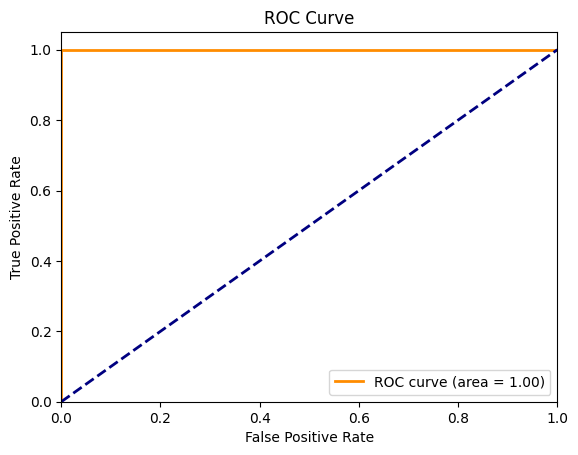

Precision: 1.0
Recall: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot ROC curve (Note: ROC curve may not be applicable for binary classification)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

precision = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[0, 1])
recall = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[1, 0])

print("Precision:", precision)
print("Recall:", recall)


STEP 4 CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds (e.g., 5 or 10)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store evaluation metrics (e.g., accuracy) for each fold
fold_metrics = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train your machine learning model on X_train_fold and y_train_fold
    # Evaluate the model on X_val_fold and y_val_fold
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)

    # Calculate evaluation metrics (e.g., accuracy) for each fold
    accuracy = accuracy_score(y_val_fold, y_pred)
    fold_metrics.append(accuracy)

# Calculate the mean and standard deviation of evaluation metrics
mean_accuracy = sum(fold_metrics) / len(fold_metrics)
std_accuracy = np.std(fold_metrics)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation of Accuracy: {std_accuracy}")


Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be a leaf node
}
# Instantiate the grid search with your model and the hyperparameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print("Best Model Metrics:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1-Score: {f1_best:.2f}")
print(f"ROC-AUC: {roc_auc_best:.2f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'churn_prediction_model.pkl')
